## 1. 資料讀入, 預處理

In [1]:
import pandas as pd
fb = pd.read_csv('nysu_10902_2019_research_right.csv')politics = pd.read_csv('9th_legislator_promise.csv')

In [2]:
fb.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,244784245612709_2052039854887130,244784245612709,陳學聖,政治人物,鑒於中油觀塘案在環評大會迅速通關，原先專案小組考量對藻礁生態有重大影響，建議退回目的事業主管...,NaN,photo,https://www.facebook.com/244784245612709/posts...,2019-01-15T11:00:16+0000,2019-01-15T19:00:16,...,NaN,NaN,144,0,0,0,0,0,6,5


In [3]:
# 查看立委名冊
politics.head()

,縣市,選區,姓名,在任狀態,政黨,政見,備註
0,台北,一,吳思瑤,1.0,民主進步黨,1、北投天母宜居社區 改善天母交通，拒絕大型開發，保存綠地與文化資產。 爭取復興崗國防大學校...,NaN
1,台北,二,姚文智,0.0,民主進步黨,「點亮台灣」：完成台灣史上首次國會政黨輪替，深化民主；支持、協助並督促新政府推動「英派革新，...,2018/11/18辭職
2,台北,二,何志偉,2.0,民主進步黨,【拼！新經濟，好生活】四大政策主軸： 一、水經濟，親水零距離，河岸大公園。 市中心有大...,缺額補選
3,台北,三,蔣萬安,1.0,中國國民黨,一、立委要傾聽民意，推動立法解決問題。萬安會秉持理性問政、創新立法 理念，為民眾服務。 二、...,NaN
4,台北,四,李彥秀,1.0,中國國民黨,用心陪你走 大手牽小手 1.強化公托、臨托制度。 2.編制儲備教師，成立安親系統，活化校...,NaN


In [4]:
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

In [5]:
fb.page_name.unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘'], dtype=object)

## 2. 使用呂孫綾作為查看對象

In [6]:
lu = fb.loc[fb.page_name == '呂孫綾']
lu.head()

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
6749,932173560139717_2266532516703808,932173560139717,呂孫綾,公眾人物,#行政院長蘇貞昌拜會立法院囉,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-15T03:35:55+0000,2019-01-15T11:35:55,...,NaN,NaN,257,0,0,0,0,0,8,8
6750,932173560139717_2264889630201430,932173560139717,呂孫綾,公眾人物,『大師揮毫贈春聯 親子黏土春聯活動』1月20日(日)準備開跑囉📣\n\n🐽親子黏土春聯活動 ...,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-14T03:55:12+0000,2019-01-14T11:55:12,...,NaN,NaN,314,0,0,0,0,0,3,11
6751,932173560139717_2261684857188574,932173560139717,呂孫綾,公眾人物,歲末將至，揮別農曆狗年，豬年即將到來🐽\n除了先向大家拜個早年，也要通知大家一個好消息📣\n...,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-12T03:12:45+0000,2019-01-12T11:12:45,...,NaN,NaN,464,0,0,0,0,0,9,34
6752,932173560139717_2260361980654195,932173560139717,呂孫綾,公眾人物,蘇貞昌院長，是開啟我政治服務之路最重要的導師，尤其蘇院長在2016的選舉中，不斷鼓勵我、給予...,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-11T05:50:09+0000,2019-01-11T13:50:09,...,NaN,NaN,253,0,0,0,0,0,8,24
6753,932173560139717_2259236954100031,932173560139717,呂孫綾,公眾人物,在臨時會的最後一天，今年度的總預算終於通過，我非常感謝賴院長和我一起成功推動淡江大橋、淡水和...,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-10T11:38:27+0000,2019-01-10T19:38:27,...,NaN,NaN,1551,0,0,0,0,0,15,29


In [7]:
lu.loc[lu.created_time_taipei == max(lu.created_time_taipei),
      "created_time_taipei"]
# 蒐到的fb資料中，最晚的日期是`2019-12-11T12:33:58+0000`

7179    2019-12-11T20:33:58
Name: created_time_taipei, dtype: object

In [8]:
lu.loc[lu.created_time_taipei == min(lu.created_time_taipei),
      "created_time_taipei"]
# 蒐到的fb資料中，最早的日期是 `2019-01-03T14:19:05`

6759    2019-01-03T14:19:05
Name: created_time_taipei, dtype: object

In [9]:
lu.loc[:,'new_date'] = pd.to_datetime(lu['created_time_taipei']).dt.date
lu.loc[:,'month_year'] = pd.to_datetime(lu['new_date']).dt.to_period('M')

/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [10]:
lu['new_date'].value_counts()

2019-12-08    5
2019-11-17    5
2019-11-12    4
2019-10-13    4
2019-12-01    4
             ..
2019-08-07    1
2019-02-06    1
2019-05-06    1
2019-10-02    1
2019-05-05    1
Name: new_date, Length: 286, dtype: int64

In [11]:
lu['month_year'].value_counts()

2019-11    81
2019-10    62
2019-09    51
2019-05    42
2019-06    40
2019-07    34
2019-08    33
2019-12    32
2019-01    30
2019-03    26
2019-02    25
2019-04    20
Freq: M, Name: month_year, dtype: int64

In [12]:
lu.head()

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
6749,932173560139717_2266532516703808,932173560139717,呂孫綾,公眾人物,#行政院長蘇貞昌拜會立法院囉,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-15T03:35:55+0000,2019-01-15T11:35:55,...,257,0,0,0,0,0,8,8,2019-01-15,2019-01
6750,932173560139717_2264889630201430,932173560139717,呂孫綾,公眾人物,『大師揮毫贈春聯 親子黏土春聯活動』1月20日(日)準備開跑囉📣\n\n🐽親子黏土春聯活動 ...,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-14T03:55:12+0000,2019-01-14T11:55:12,...,314,0,0,0,0,0,3,11,2019-01-14,2019-01
6751,932173560139717_2261684857188574,932173560139717,呂孫綾,公眾人物,歲末將至，揮別農曆狗年，豬年即將到來🐽\n除了先向大家拜個早年，也要通知大家一個好消息📣\n...,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-12T03:12:45+0000,2019-01-12T11:12:45,...,464,0,0,0,0,0,9,34,2019-01-12,2019-01
6752,932173560139717_2260361980654195,932173560139717,呂孫綾,公眾人物,蘇貞昌院長，是開啟我政治服務之路最重要的導師，尤其蘇院長在2016的選舉中，不斷鼓勵我、給予...,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-11T05:50:09+0000,2019-01-11T13:50:09,...,253,0,0,0,0,0,8,24,2019-01-11,2019-01
6753,932173560139717_2259236954100031,932173560139717,呂孫綾,公眾人物,在臨時會的最後一天，今年度的總預算終於通過，我非常感謝賴院長和我一起成功推動淡江大橋、淡水和...,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-10T11:38:27+0000,2019-01-10T19:38:27,...,1551,0,0,0,0,0,15,29,2019-01-10,2019-01


## 3. 將 `lu` 的欄位，按照月份groupby後加總

即可計算出呂孫綾的每月聲量數值

In [13]:
## 先再看一次 `lu` 的每個欄位
lu.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
6749,932173560139717_2266532516703808,932173560139717,呂孫綾,公眾人物,#行政院長蘇貞昌拜會立法院囉,NaN,photo,https://www.facebook.com/932173560139717/posts...,2019-01-15T03:35:55+0000,2019-01-15T11:35:55,...,257,0,0,0,0,0,8,8,2019-01-15,2019-01


In [14]:
results = lu.groupby('month_year').sum()
results

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
month_year,,,,,,,,,
2019-01,27965206804191492,11191,0,0,0,0,0,322,448
2019-02,23304339003492912,14271,0,0,0,0,0,537,438
2019-03,24236512563632628,21936,0,0,0,0,0,1206,567
2019-04,18643471202794332,14598,0,0,0,0,0,628,377
2019-05,39151289525868096,29616,0,0,0,0,0,1760,875
2019-06,37286942405588656,33459,0,0,0,0,0,1122,834
2019-07,31693901044750356,29916,0,0,0,0,0,1154,860
2019-08,30761727484610640,72061,0,0,0,0,0,2929,1337
2019-09,47540851567125576,102168,0,0,0,0,0,4358,1863


稍微了解一下 `like_count`,`share_count`,`comment_count` 這三個等等會視覺化觀察的指標

In [15]:
results.loc[:,['like_count','share_count','comment_count']].describe()

,like_count,share_count,comment_count
count,12.000000,12.000000,12.000000
mean,61481.083333,1295.500000,2694.083333
std,59274.836681,1033.626053,2687.919150
min,11191.000000,377.000000,322.000000
25%,20101.500000,537.250000,998.500000
50%,31687.500000,867.500000,1483.000000
75%,79587.750000,1602.000000,3648.500000
max,194904.000000,3762.000000,9501.000000


In [16]:
results.loc[:,['like_count','share_count','comment_count']].agg([min,max])

,like_count,share_count,comment_count
min,11191,377,322
max,194904,3762,9501


In [17]:
results.index.name = 'newhead'
results.reset_index(inplace=True)
results.head()

,newhead,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-01,27965206804191492,11191,0,0,0,0,0,322,448
1,2019-02,23304339003492912,14271,0,0,0,0,0,537,438
2,2019-03,24236512563632628,21936,0,0,0,0,0,1206,567
3,2019-04,18643471202794332,14598,0,0,0,0,0,628,377
4,2019-05,39151289525868096,29616,0,0,0,0,0,1760,875


In [18]:
tmp = results['newhead'].map(str)
isinstance(tmp[0],str)
## 將`newhead`轉為str, 準備作為圖片label

True

## 4. 將呂孫綾每月 fb 聲量視覺化

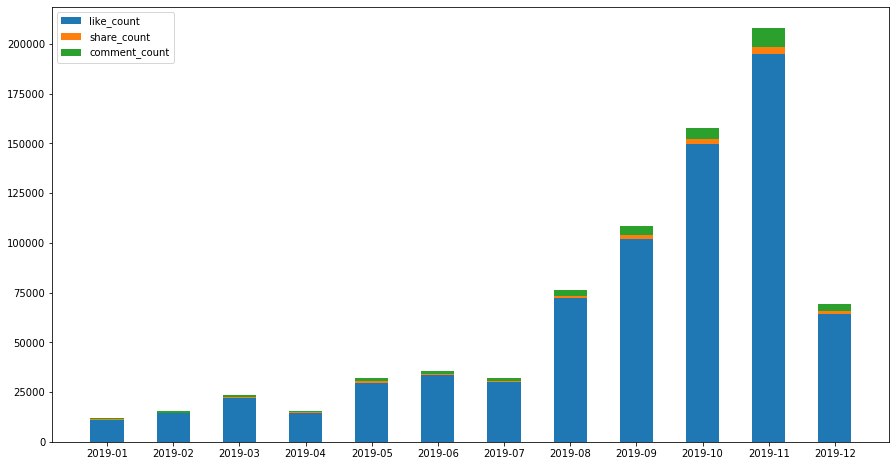

In [44]:
import matplotlib.pyplot as plt

labels = results['newhead'].map(str)
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 8)

ax.bar(labels, results['like_count'], width, label='like_count')
ax.bar(labels, results['share_count'], width, label='share_count', bottom=results['like_count'])
ax.bar(labels, results['comment_count'], width, label='comment_count', bottom=results['share_count']+results['like_count'])

ax.legend()
plt.show()

可以觀察到，呂孫綾的臉書聲量顯然是隨著選舉熱度逐漸升高。
而綜合選前的時事，我決定觀察兩個重點

1. 呂孫綾上館長節目是在11/23
2. 12的聲量為何突然跌落

In [20]:
nov = lu.loc[lu.month_year == "2019-11"].groupby('new_date').sum()
nov.head()

,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
new_date,,,,,,,,,
2019-11-01,1864347120279434,6253,0,0,0,0,0,199,86
2019-11-02,1864347120279434,4214,0,0,0,0,0,170,36
2019-11-03,1864347120279434,3625,0,0,0,0,0,134,47
2019-11-04,932173560139717,1977,0,0,0,0,0,62,55
2019-11-05,932173560139717,6229,0,0,0,0,0,164,99


In [21]:
## 最多討論
nov.loc[nov.like_count == max(nov.like_count),['like_count']]

,like_count
new_date,
2019-11-29,18024


In [22]:
nov.index.name = 'the_date'
nov.reset_index(inplace=True)
nov.head()

,the_date,page_id,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
0,2019-11-01,1864347120279434,6253,0,0,0,0,0,199,86
1,2019-11-02,1864347120279434,4214,0,0,0,0,0,170,36
2,2019-11-03,1864347120279434,3625,0,0,0,0,0,134,47
3,2019-11-04,932173560139717,1977,0,0,0,0,0,62,55
4,2019-11-05,932173560139717,6229,0,0,0,0,0,164,99


In [23]:
len(nov['like_count'])

30

In [24]:
nov.shape[0]

30

/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


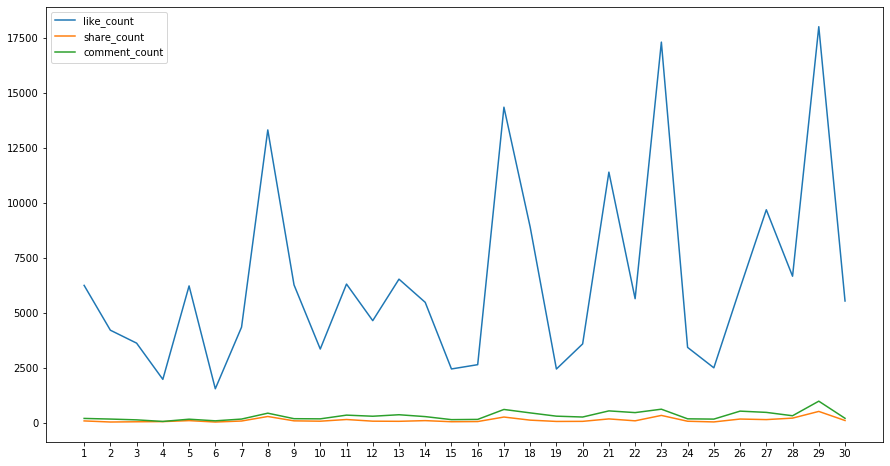

In [46]:
#labels = nov.the_date.map(lambda i: str(i))
labels = [str(i) for i in range(1,nov.shape[0]+1)]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax.plot(labels, nov['like_count'], label = 'like_count')
ax.plot(labels, nov['share_count'], label = 'share_count')
ax.plot(labels, nov['comment_count'], label = 'comment_count')

ax.legend()

plt.show()

較高的時間點有 8, 17, 23, 29這四天，因此我們依序取出這四天的文章來觀察

我先將11月每天的發文總數計算出來，可以發現其實只有17號發了較多篇文章，另外三個聲量較高的日期，並沒有特別發比較多的臉書文。

In [26]:
lu.loc[lu.month_year == '2019-11'].new_date.value_counts()

2019-11-17    5
2019-11-13    4
2019-11-11    4
2019-11-12    4
2019-11-26    4
2019-11-28    4
2019-11-21    4
2019-11-30    4
2019-11-22    3
2019-11-29    3
2019-11-09    3
2019-11-23    3
2019-11-20    3
2019-11-27    3
2019-11-14    3
2019-11-08    3
2019-11-16    2
2019-11-24    2
2019-11-18    2
2019-11-15    2
2019-11-19    2
2019-11-01    2
2019-11-03    2
2019-11-07    2
2019-11-02    2
2019-11-10    2
2019-11-04    1
2019-11-05    1
2019-11-25    1
2019-11-06    1
Name: new_date, dtype: int64

接著，再把8號發的文章內容取出檢視：

In [34]:
lu.new_date.loc[:] = lu.new_date.map(lambda d: str(d))
mes = lu.loc[lu.new_date == '2019-11-08', "message"]
print(f'1.:\n{list(mes)[0]},\n\n2.:\n{list(mes)[1]}\n\n3.:\n{list(mes)[2]}')

1.:
原來，呂孫綾吃了酸梅也會那麼酸！,

2.:
家有3歲以下幼兒的好朋友，呂孫綾報乎您知！ 👨‍👩‍👧👪
　　
今年8月準公共化幼兒園政策正式啟動， 0-2歲送保母或托嬰中心，有托育補助，3-6歲去上學有學費補助。但是2-3歲的小朋友，如果沒去幼兒園，是由保母或托嬰中心照顧，卻沒有辦法再領托育補助。
　　
經過各方努力與爭取，政府從明年開始，2-3歲繼續給公共托育照顧的孩子，可以繼續領每月3000元補助；繼續給準公共保母、準公共托嬰中心照顧的小孩，也可以繼續領每月6000元補助。讓台灣的孩子，由政府共同支持、一起照顧，減輕父母的經濟負擔。

此外，政府還要每年增設2歲專班，並持續投入資源，2024年將增加2歲專班800班，提供1萬2000個招生名額，希望藉由這樣的政策引導，能夠減輕父母、家長照護孩子的壓力！

☎️詳情請打免付費福利諮詢專線：1957

#好政策報乎您知呂孫綾😘😘
#減輕家庭父母照顧孩子的負擔👨‍👩‍👧👨‍👩‍👧👪👪
#繼續要求政府投入資源增設2歲專班❤️❤️
#不分大小事認真做好幼托事

3.:
大家早安！😘😘😘

今天立冬，明天又是星期六，準備買菜了嗎？🥬🌽🍅🥦🍆🥕
阿北已經90歲了，但是每天都活力衝勁十足，在菜市場裡熱情招呼客人。每天充滿樂觀正能量，就是我每天動力的來源，也希望能傳遞給大家喔！

#活力衝勁呂孫綾🏋️‍♀️🏋️‍♀️🏋️‍♀️
#90歲依然要活力滿滿充滿樂觀❤️❤️
#老薑辣南瓜甜地瓜葉嫩山藥養生🍚🥗
#不分大小事認真做好家鄉事


/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/deadfate-sky/miniconda3/envs/idp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


在8號的文章，其實沒有什麼太特別的內容。


在 11/23 號的按讚數量特別高，推測跟上館長的節目有關係。但這些讚的態度是「稱讚」還是「倒讚」，就必須看留言的內容才能決定。

In [41]:
mes = lu.loc[lu.new_date == '2019-11-23', "message"]
print(f'文章數: {len(list(mes))}')
print(f'1.:\n{list(mes)[0]},\n\n2.:\n{list(mes)[1]}\n\n3.:\n{list(mes)[2]}')

文章數: 3
1.:
呂孫綾始終相信 #一票一腳印，只有實在、誠懇地跟鄉親好朋友堅定站在一起，為我的家鄉認真努力打拼做事，是我從政以來不變的初衷！

#淡水北新路呂孫綾
#2020台灣要贏
#守護台灣蔡英文新北第一呂孫綾
#不分大小事認真做好家鄉事,

2.:
【11/30(六)海波兒童劇團在泰山】
#活動完全免費無需報名歡迎直接入場🎉

呂孫綾姐姐的親子活動又來囉！
11/30(六)晚上7點，最喜歡小朋友的呂孫綾姐姐邀請海波兒童劇團來到我們泰山！

呂孫綾姐姐將帶著各位大朋友、小朋友們一起穿越奇幻森林，解救被女巫抓走的王子，當天還有帶動唱、互動遊戲等趣味活動，快一起和我們加入這場奇幻之旅吧！

✨時間：2019年11月30日(六)晚上7點
(歡迎提前進場優先入座)
✨地點：泰山明志國小操場
(新北市泰山區新生路2號)

另外現在透過網路報名登記，前100名的小朋友，就能獲得小禮物哦！另外將於現場抽出10位小朋友，一起加入麻吉貓、蹦蹦獅的蹦跳派對！

✏️《小精綾募集中—泰山明志國小》網路登記表
https://forms.gle/TRhJKDK2jb1A3pc18

3.:
「抗中護台」是我們一致的目標，也是台灣人民的普世價值，在這條路上我們每位都是 #台灣隊 的一員。

感謝這麼多的朋友和鄉親支持，更感謝阿館哥對於國家社會時政的針貶，讓我們對未來的台灣更充滿期待。

2020台灣要贏，離投票只剩不到50天，希望大家都能夠在明年的1/11號站出來，投出手中的一票，一起和 蔡英文 Tsai Ing-wen總統守護台灣的民主與自由！

#謝謝館哥
#2020台灣要贏
#守民主護台灣
#4年創奇蹟呂孫綾有成績


11/29 的發文，也沒有太過於特別的內容。

In [48]:
mes = lu.loc[lu.new_date == '2019-11-29', "message"]
print(f'文章數: {len(list(mes))}')
print(f'1.:\n{list(mes)[0]},\n\n2.:\n{list(mes)[1]}\n\n3.:\n{list(mes)[2]}')

文章數: 3
1.:
呂孫綾主張：

全民下架  吳斯懷。,

2.:
就在明天！海波兒童劇團在泰山！！
#活動完全免費無需報名歡迎直接入場🎉

呂孫綾姐姐將會化身精綾姐姐帶著各位大朋友、小朋友們一起穿越奇幻森林，解救被女巫抓走的王子，當天還有帶動唱、互動遊戲等趣味活動，快一起和我們加入這場奇幻之旅吧！

✨時間：2019年11月30日(六)晚上7點
(歡迎提前進場優先入座)
✨地點：泰山明志國小操場
(新北市泰山區新生路2號)

現在透過網路報名登記，前100名的小朋友，就能獲得小禮物哦！另外將於現場抽出10位小朋友，一起加入麻吉貓、蹦蹦獅的蹦跳派對！
✏️《小精綾募集中—泰山明志國小》網路登記表
https://forms.gle/TRhJKDK2jb1A3pc18

3.:
早安！

天氣越來越冷，寒流一波一波接力報到，呂孫綾提醒大家，一定要隨時注意保暖、多喝溫開水喔！

#在地女兒懇請賜票呂孫綾
#2020台灣自由民主一定要贏
#總統蔡英文一票立委呂孫綾一票
#4年創奇蹟呂孫綾有成績
